# Turkey Earthquake - Tweets Processing
---

![](https://images.unsplash.com/photo-1601931163309-fe9459564c03?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=774&q=80)

# Installs

In [1]:
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

# Imports

In [20]:
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter
import re

from sklearn.model_selection import train_test_split

from pycaret.classification import *

from imblearn.over_sampling import SMOTE

# Data Loading

In [7]:
import pandas as pd

data = pd.read_csv('tweets.csv', nrows=10000)

In [8]:
data.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source
0,2023-02-21 03:30:04+00:00,तुर्की में सोमवार देर रात भूंकप के तेज झटके मह...,"['ATDigital', 'Turkey', 'Earthquake', 'TurkeyE...",0,0,19727712,True,hi,NaN,NaN,Twitter Media Studio
1,2023-02-21 03:29:07+00:00,New search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1,0,5697,True,en,NaN,NaN,Twitter Web App
2,2023-02-21 03:29:04+00:00,Can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0,0,1,False,en,NaN,NaN,Twitter for Android
3,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0,0,3,False,en,NaN,NaN,Twitter for Android
4,2023-02-21 03:27:38+00:00,Turkiye Earthquake: तुर्किए में फिर आया भूकंप ...,"['turkey', 'earthquake', 'turkiye', 'india', '...",0,0,17,False,und,NaN,NaN,Twitter for Android


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             10000 non-null  object
 1   content          10000 non-null  object
 2   hashtags         10000 non-null  object
 3   like_count       10000 non-null  int64 
 4   rt_count         10000 non-null  int64 
 5   followers_count  10000 non-null  int64 
 6   isVerified       10000 non-null  bool  
 7   language         10000 non-null  object
 8   coordinates      437 non-null    object
 9   place            398 non-null    object
 10  source           10000 non-null  object
dtypes: bool(1), int64(3), object(7)
memory usage: 791.1+ KB


In [10]:
data.isna().any()

date               False
content            False
hashtags           False
like_count         False
rt_count           False
followers_count    False
isVerified         False
language           False
coordinates         True
place               True
source             False
dtype: bool

# Preprocessing the Tweets

In [11]:
import re
import string

### Preprocessing Function

In [12]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [13]:
data['content'] = data['content'].apply(preprocess_text)

### Commonly Used Words

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [15]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(data['content'].values)

In [16]:
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [17]:
# Split the text into individual words
words = all_text.split()

In [24]:
# Remove stop words
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
# Count the frequency of each word
word_counts = Counter(words)

In [26]:
top_words = word_counts.most_common(100)
top_words

[('earthquake', 1597),
 ('ago', 1215),
 ('turkey', 1199),
 ('km', 1187),
 ('min', 1089),
 ('info', 1018),
 ('people', 976),
 ('strikes', 922),
 ('syria', 734),
 ('64', 687),
 ('amp', 667),
 ('magnitude', 657),
 ('aid', 527),
 ('hit', 519),
 ('victims', 485),
 ('de', 445),
 ('time', 440),
 ('help', 424),
 ('hatay', 405),
 ('new', 400),
 ('local', 395),
 ('rubble', 389),
 ('affected', 380),
 ('another', 375),
 ('rescue', 342),
 ('6', 340),
 ('🇹🇷', 326),
 ('border', 323),
 ('struck', 318),
 ('two', 311),
 ('2', 309),
 ('support', 308),
 ('من', 301),
 ('devastating', 285),
 ('buildings', 278),
 ('relief', 278),
 ('occurred', 275),
 ('region', 267),
 ('turkish', 260),
 ('🌐', 251),
 ('earthquakes', 248),
 ('southern', 247),
 ('en', 245),
 ('📱', 243),
 ('في', 242),
 ('via', 238),
 ('nw', 234),
 ('us', 232),
 ('sw', 229),
 ('death', 222),
 ('toll', 222),
 ('weeks', 213),
 ('quake', 209),
 ('today', 206),
 ('many', 205),
 ('se', 205),
 ('के', 204),
 ('days', 204),
 ('disaster', 203),
 ('में', 2

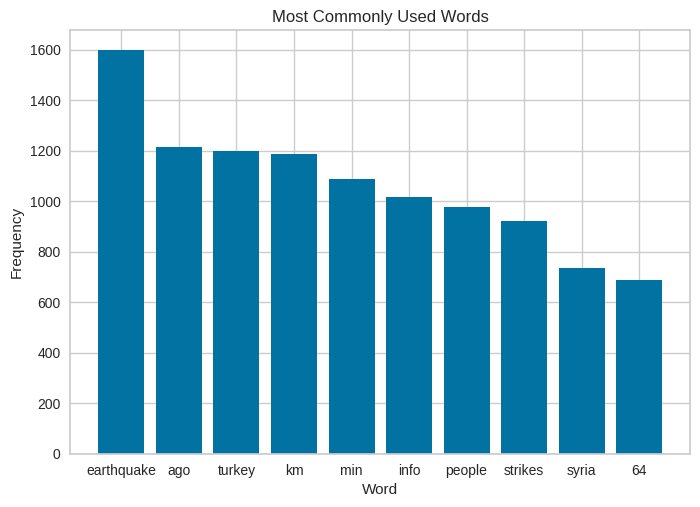

In [27]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# Creating Classes for Tweets

---
**"Help":** Tweets that express a need for assistance or ask for help, such as:

"We need supplies and shelter for the earthquake victims"

"Please help those affected by the earthquake by donating to relief efforts"

---

**"News":** Tweets that share information about the earthquake or its aftermath, such as:

"Magnitude 6.8 earthquake strikes Turkey and Syria"

"Rescue teams continue to search for survivors in the rubble"

---

**"Funding":** Tweets that promote or discuss fundraising efforts for earthquake relief, such as:

"Join our fundraising campaign to help those affected by the earthquake"

"Which charities are accepting donations for the earthquake relief efforts?"

---

**"Survivor stories":** Tweets that share personal accounts or experiences of the earthquake, such as:

"I was in the middle of a meeting when the earthquake hit. It was the scariest moment of my life"

"My family and I are safe, but our house was severely damaged in the earthquake"

---

**"Volunteering":** Tweets that promote or discuss volunteer efforts for earthquake relief, such as:

"We need volunteers to help with search and rescue operations in the affected areas"

"If you want to help, consider volunteering at a local shelter or distribution center"

---


**"Political response":** Tweets that discuss the government or political response to the earthquake, such as:

"The government needs to do more to support the earthquake victims and rebuild the affected areas"

"I'm disappointed in the lack of action from our elected officials regarding the earthquake relief efforts"

---


**"Humanitarian aid":** Tweets that discuss or promote humanitarian aid efforts for the earthquake, such as:

"The Red Cross is on the ground providing emergency relief to those affected by the earthquake"

"International aid organizations are stepping up to help with the earthquake recovery efforts"

---

In [52]:
# Define the classes and their corresponding keywords
classes = {
    'Help': ['help', 'assistance', 'support', 'donate','donor', 'relief'],
    'News': ['earthquake', 'magnitude', 'aftershock', 'rescue', 'recovery'],
    'Funding': ['fundraiser', 'donation', 'charity', 'fund'],
    'Survivor stories': ['survivor', 'personal account', 'experience', 'impact'],
    'Volunteering': ['volunteer', 'helping', 'aid', 'support'],
    'Political response': ['government', 'political', 'action', 'response'],
    'Humanitarian aid': ['humanitarian', 'aid', 'relief', 'support'],
    'Casualty reports': ['injury', 'death', 'fatal', 'missing', 'victims'],
    'Infrastructure damage': ['building', 'bridge', 'road', 'power', 'water', 'gas', 'telecommunications'],
    'Weather conditions': ['storm', 'rain', 'snow', 'wind', 'temperature', 'weather'],
    'Emergency services': ['ambulance', 'fire', 'police', 'emergency', 'rescue'],
    'Social media activity': ['tweet', 'post', 'share', 'social media'],
    'Prayer and condolences': ['prayer', 'thoughts', 'condolences', 'sympathy'],
    'Personal safety': ['safety', 'evacuation', 'shelter', 'protection', 'precaution']
}

# Define a function to label each tweet based on its content
def classify_tweet(tweet_text):
    for class_name, keywords in classes.items():
        for keyword in keywords:
            if keyword in tweet_text:
                return class_name
    return 'Other'  # If no keyword matches, label as "Other"

# Add a new column to the dataframe with the class label for each tweet
data['Class'] = data['content'].apply(classify_tweet)

# Save the labeled dataset to a new CSV file
data.to_csv('tweet_data_labeled.csv', index=False)


### Updated CSV

In [53]:
df = pd.read_csv('tweet_data_labeled.csv')

In [54]:
df

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source,Class
0,2023-02-21 03:30:04+00:00,तुर्की में सोमवार देर रात भूंकप के तेज झटके मह...,"['ATDigital', 'Turkey', 'Earthquake', 'TurkeyE...",0,0,19727712,True,hi,NaN,NaN,Twitter Media Studio,Other
1,2023-02-21 03:29:07+00:00,new search amp rescue work is in progress in a...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1,0,5697,True,en,NaN,NaN,Twitter Web App,News
2,2023-02-21 03:29:04+00:00,cant imagine those who still havent recovered ...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0,0,1,False,en,NaN,NaN,Twitter for Android,News
3,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0,0,3,False,en,NaN,NaN,Twitter for Android,Political response
4,2023-02-21 03:27:38+00:00,turkiye earthquake तुर्किए में फिर आया भूकंप,"['turkey', 'earthquake', 'turkiye', 'india', '...",0,0,17,False,und,NaN,NaN,Twitter for Android,News
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-02-14 14:36:07+00:00,did you guys find our video response to the fr...,"['TurkeyEarthquake', 'Syria', 'Earthquake']",3,3,1019267,True,en,NaN,NaN,Twitter Web App,Political response
9996,2023-02-14 14:35:55+00:00,a short break after a hard days work in this c...,"['earthquake', 'Syria', 'Emergency_Response_Te...",2,0,3670,False,en,NaN,NaN,Twitter Web App,Weather conditions
9997,2023-02-14 14:34:19+00:00,شاحنات تنقل المواد الإغاثية إلى متضرري في منطق...,"['صور', 'السعودية', 'الزلزال', 'جنديرس', 'حلب'...",6,0,66703,False,ar,NaN,NaN,Twitter Web App,Other
9998,2023-02-14 14:34:16+00:00,35 km w of 50 min ago local time 154403 colore...,"['Earthquake', 'Latakia', 'Syria']",17,1,289319,True,en,"Coordinates(longitude=35.4, latitude=35.57)",NaN,EMSC Felt earthquakes,Survivor stories


### Distribution of Classes

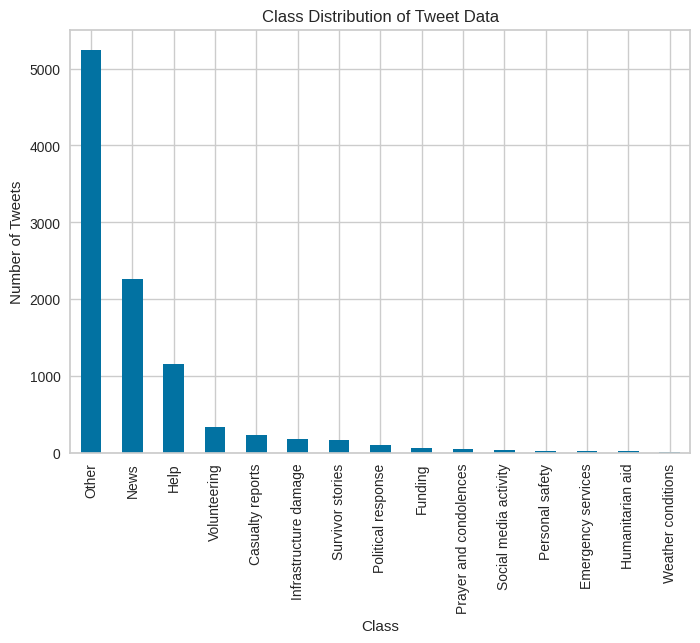

In [55]:
# Create a bar plot of the class distribution
class_counts = df['Class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Tweet Data')
plt.xlabel('Class')
plt.ylabel('Number of Tweets')
plt.show()

### Converting Text into Numerical Features

In [56]:
df.columns

Index(['date', 'content', 'hashtags', 'like_count', 'rt_count',
       'followers_count', 'isVerified', 'language', 'coordinates', 'place',
       'source', 'Class'],
      dtype='object')

In [57]:
df.drop(['date', 'hashtags', 'like_count', 'rt_count',
       'followers_count', 'isVerified', 'language', 'coordinates', 'place',
       'source'], axis = 1, inplace = True)

In [58]:
df['content'].isna().sum()

297

In [59]:
df.dropna(axis = 0, inplace = True)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['content'])
y = df['Class']

### Simple Prediction of Classes

In [61]:
# Sample input tweet
input_tweet = "I just donated to the earthquake relief fund. Let's support those affected by this disaster. #donation #earthquake #relief"

# Classify the tweet
predicted_class = classify_tweet(input_tweet)

# Print the predicted class
print('Predicted class:', predicted_class)

Predicted class: Help


# Comparing Classification Models

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
s = setup(data=df, target='Class', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"Casualty reports: 0, Emergency services: 1, Funding: 2, Help: 3, Humanitarian aid: 4, Infrastructure damage: 5, News: 6, Other: 7, Personal safety: 8, Political response: 9, Prayer and condolences: 10, Social media activity: 11, Survivor stories: 12, Volunteering: 13, Weather conditions: 14"
4,Original data shape,"(9703, 2)"
5,Transformed data shape,"(9703, 2)"
6,Transformed train set shape,"(6792, 2)"
7,Transformed test set shape,"(2911, 2)"
8,Categorical features,1
9,Preprocess,True


In [64]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5330,0.5394,0.5330,0.6796,0.3926,0.0638,0.1807,0.5080
rf,Random Forest Classifier,0.5330,0.5394,0.5330,0.6796,0.3926,0.0638,0.1807,0.9560
gbc,Gradient Boosting Classifier,0.5330,0.5394,0.5330,0.6796,0.3926,0.0638,0.1807,7.7850
et,Extra Trees Classifier,0.5330,0.5394,0.5330,0.6796,0.3926,0.0638,0.1807,0.8850
xgboost,Extreme Gradient Boosting,0.5330,0.5394,0.5330,0.6796,0.3926,0.0638,0.1807,1.3790
lightgbm,Light Gradient Boosting Machine,0.5328,0.5394,0.5328,0.6792,0.3924,0.0635,0.1798,0.6260
lr,Logistic Regression,0.5293,0.5348,0.5293,0.6038,0.3860,0.0550,0.1587,0.6730
ada,Ada Boost Classifier,0.5275,0.5284,0.5275,0.6386,0.3822,0.0482,0.1539,0.6170
lda,Linear Discriminant Analysis,0.5141,0.5334,0.5141,0.2910,0.3541,0.0192,0.0796,0.2970
svm,SVM - Linear Kernel,0.5125,0.0000,0.5125,0.3180,0.3512,0.0120,0.0606,0.3020


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

### Class Distributions

In [65]:
# Count the number of instances in each class
class_counts = df['Class'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
Other                     4945
News                      2265
Help                      1163
Volunteering               346
Casualty reports           231
Infrastructure damage      190
Survivor stories           174
Political response         110
Funding                     73
Prayer and condolences      54
Social media activity       44
Personal safety             33
Emergency services          30
Humanitarian aid            26
Weather conditions          19
Name: Class, dtype: int64


# Visualizations

In [66]:
from wordcloud import WordCloud

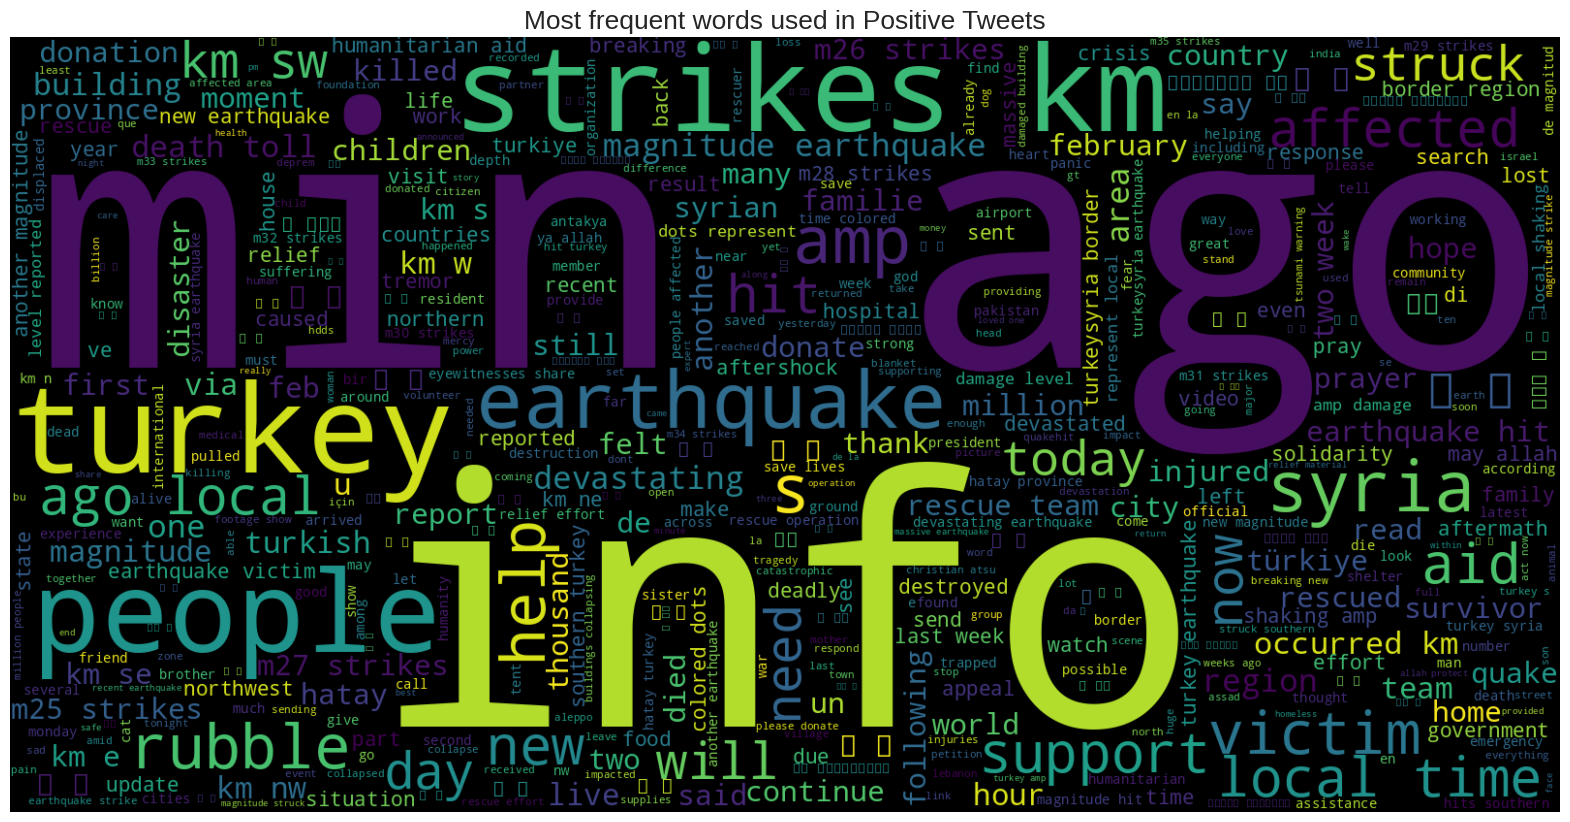

In [67]:
text = ' '.join([word for word in df['content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Positive Tweets', fontsize=19)
plt.show()

# Decision Tree Classifier

In [68]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5324,0.5448,0.5324,0.6916,0.3925,0.0636,0.1805
1,0.5279,0.5377,0.5279,0.7081,0.3832,0.0524,0.1644
2,0.5376,0.5457,0.5376,0.7119,0.4026,0.0757,0.1977
3,0.5317,0.5393,0.5317,0.6794,0.3893,0.0613,0.1794
4,0.5302,0.5339,0.5302,0.6569,0.3869,0.0566,0.1710
5,0.5346,0.5398,0.5346,0.6596,0.3964,0.0672,0.1849
6,0.5434,0.5501,0.5434,0.6734,0.4107,0.0887,0.2159
7,0.5258,0.5264,0.5258,0.6586,0.3784,0.0446,0.1513
8,0.5302,0.5369,0.5302,0.6849,0.3878,0.0555,0.1674


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [69]:
from sklearn.model_selection import cross_val_score

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(dt, X, y, cv=20)

# Predictions

In [70]:
preds = predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5345,0.5412,0,0,0,0.0681,0.1887


In [71]:
preds

,content,Class,prediction_label,prediction_score
105,شہزادہ عدالت پہنچ گیا اور واپس بھی آگیا لیکن ح...,Other,Other,0.5227
5730,starting in less than 2⃣hours‼️ join us for th...,Other,Other,0.5227
6507,m26 strikes 12 km se of 7 min ago more info,Other,Other,0.5227
2608,62 64 magnitude earthquake struck in,News,Other,0.5227
291,m58 amp m64 update 3 dead 213 injuries 190 inj...,Other,Other,0.5227
...,...,...,...,...
6822,📢very important reminder⏰📌 وہ زمانے میں معزز ت...,Other,Other,0.5227
306,🇸🇾 🇪🇬 “from the egyptian popolo to the syrian ...,Volunteering,Other,0.5227
4915,مردان در سراسر مناطق زلزله‌زده در ترکیه روز جم...,Other,Other,0.5227
38,turkey hatay latest earthquakes 294 injured 18...,News,Other,0.5227


# ROC Curve

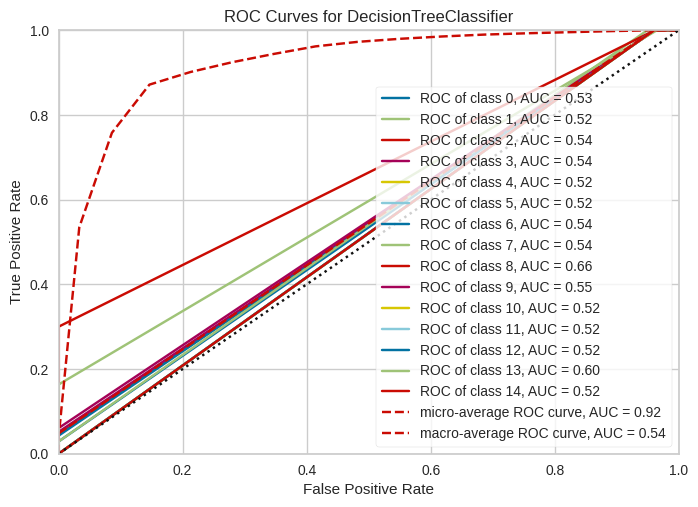

In [72]:
plot_model(dt)

# Error Plot

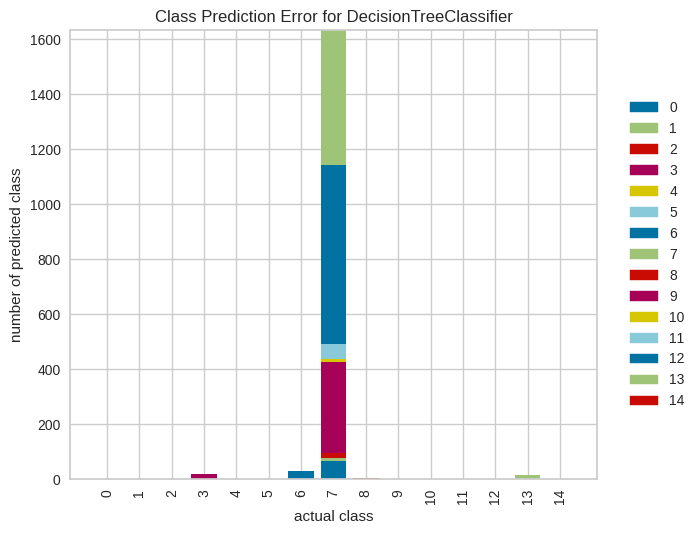

In [73]:
plot_model(dt, plot = 'error')

# Learning Curve

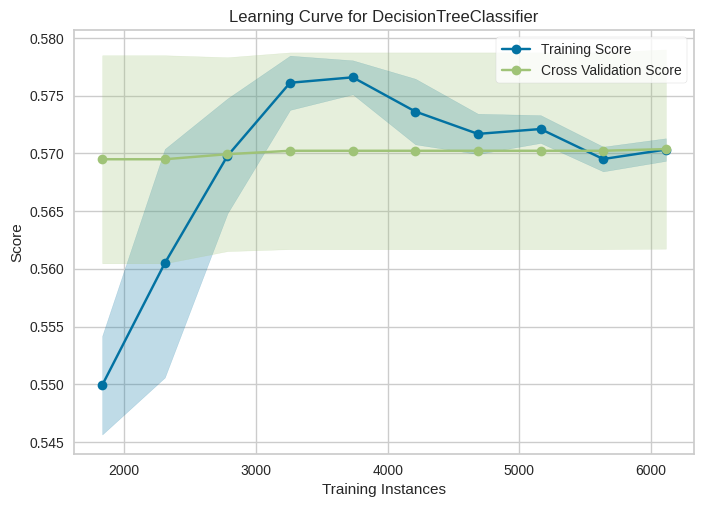

In [74]:
plot_model(dt, plot = 'learning')

# Validation Curve

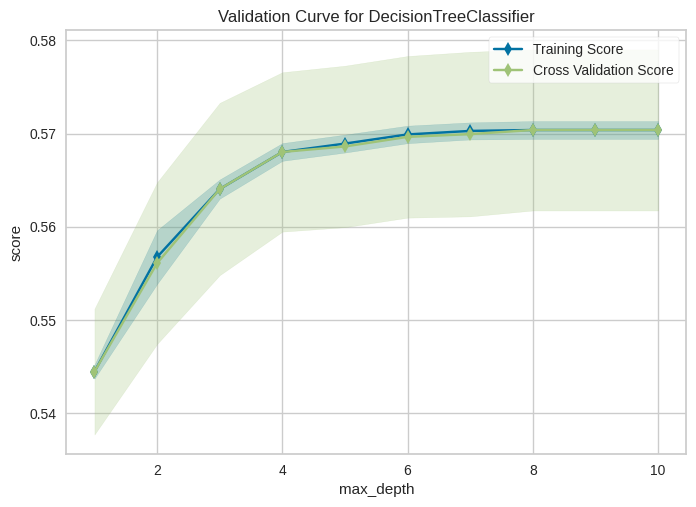

In [75]:
plot_model(dt, plot = 'vc')

# Creating Decision Tree Classifier on Vectorized Dataset

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [77]:
# train a Naive Bayes classifier
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [78]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [79]:
from sklearn.model_selection import cross_val_score

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(dt, X_train, y_train, cv=20)

In [80]:
# evaluate the classifier on the test set
y_pred = dt.predict(X_test)
y_pred

array(['News', 'Other', 'Other', ..., 'Other', 'Other', 'News'],
      dtype=object)

In [81]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9242658423493045


In [83]:
print(dt.predict('I just donated to the earthquake relief fund. Lets support those affected by this disaster'))

ValueError: ignored

# Thank You
---